# I. Overview

The objective of this assignment is to implement deep neural networks with hidden layers where there are many different structures used. This was accomplished using the TensorFlow library. For this purpose a Bank Marketing data from the UCI Machine Learning repository was used.Three of the Deep Neural Network structures were used and their accuracy and the MSE scores were calculated.

# II. Data

### Source Index

The data comes from the UCI Machine Learning repository

Link: https://archive.ics.uci.edu/ml/datasets/bank+marketing
        
### Data Set Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

### Data Attributes

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Reading the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("bank-full.csv", sep=';', header=None,low_memory=False,skiprows=[0])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
np.any(df.isnull())

False

In [6]:
df.shape

(45211, 17)

In [7]:
df.size

768587

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

# Preprocessing the data

In [10]:
df.columns =['age','job','marital_status','education','default_credit','yearly_balance','housing_loan',
             'personal_loan','contact','last_contact_day','last_contact_mth','last_contact_duration'
             ,'num_of_campaign','past_days','prev_num_contacts','poutcome','subscribed']

df

,age,job,marital_status,education,default_credit,yearly_balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_mth,last_contact_duration,num_of_campaign,past_days,prev_num_contacts,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [11]:
df.describe()

,age,yearly_balance,last_contact_day,last_contact_duration,num_of_campaign,past_days,prev_num_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
df['job']=df['job'].replace('blue-collar', 'bc', regex=True)
df['job']=df['job'].replace('admin.', 'ADMIN', regex=True)
df['job']=df['job'].replace('self-employed', 'selfem', regex=True)

df

,age,job,marital_status,education,default_credit,yearly_balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_mth,last_contact_duration,num_of_campaign,past_days,prev_num_contacts,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,bc,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [13]:

df['job1']=df.job.map(dict(management=1,technician=2,entrepreneur=3,bc=4,unknown=0,retired=5,ADMIN=6
                           ,services=7,selfem=8,unemployed=9,housemaid=10,student=11))



df['marital_status1']=df.marital_status.map(dict(married=1,single=0,divorced=2))



df['education1']=df.education.map(dict(tertiary=3,secondary=2,unknown=0,primary=1))



df['default_credit1']=df.default_credit.map(dict(no=0,yes=1))


df['housing_loan1']=df.housing_loan.map(dict(no=0,yes=1))


df['personal_loan1']=df.personal_loan.map(dict(no=0,yes=1))



df['subscribed1']=df.subscribed.map(dict(no=0,yes=1
))


df['last_contact_mth1']=df.last_contact_mth.map(dict(may=5,jun=6,jul=7,aug=8,oct=10,nov=11,dec=12,jan=1,feb=2,mar=3,
                                                     apr=4,sep=9))



df['poutcome1']=df.poutcome.map(dict(unknown=3,failure=0,other=2,success=1))


df['contact1']=df.contact.map(dict(unknown=0,cellular=1,telephone=2))


In [14]:
df.isnull().any()

age                      False
job                      False
marital_status           False
education                False
default_credit           False
yearly_balance           False
housing_loan             False
personal_loan            False
contact                  False
last_contact_day         False
last_contact_mth         False
last_contact_duration    False
num_of_campaign          False
past_days                False
prev_num_contacts        False
poutcome                 False
subscribed               False
job1                     False
marital_status1          False
education1               False
default_credit1          False
housing_loan1            False
personal_loan1           False
subscribed1              False
last_contact_mth1        False
poutcome1                False
contact1                 False
dtype: bool

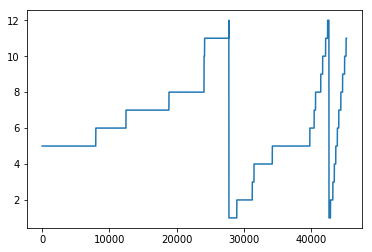

In [15]:
plt.plot(df.loc[:, 'last_contact_mth1'])

In [16]:
T = df.loc[:, 'subscribed'].copy()
T

0         no
1         no
2         no
3         no
4         no
5         no
6         no
7         no
8         no
9         no
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19        no
20        no
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
45181     no
45182    yes
45183     no
45184     no
45185    yes
45186     no
45187    yes
45188    yes
45189     no
45190    yes
45191    yes
45192    yes
45193    yes
45194     no
45195    yes
45196    yes
45197    yes
45198     no
45199     no
45200    yes
45201    yes
45202    yes
45203    yes
45204    yes
45205    yes
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: subscribed, Length: 45211, dtype: object

In [17]:
X = df.iloc[:, :-1].copy()
X

,age,job,marital_status,education,default_credit,yearly_balance,housing_loan,personal_loan,contact,last_contact_day,...,subscribed,job1,marital_status1,education1,default_credit1,housing_loan1,personal_loan1,subscribed1,last_contact_mth1,poutcome1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,no,1,1,3,0,1,0,0,5,3
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,no,2,0,2,0,1,0,0,5,3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,no,3,1,2,0,1,1,0,5,3
3,47,bc,married,unknown,no,1506,yes,no,unknown,5,...,no,4,1,0,0,1,0,0,5,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,no,0,0,0,0,0,0,0,5,3
5,35,management,married,tertiary,no,231,yes,no,unknown,5,...,no,1,1,3,0,1,0,0,5,3
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,...,no,1,0,3,0,1,1,0,5,3
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,...,no,3,2,3,1,1,0,0,5,3
8,58,retired,married,primary,no,121,yes,no,unknown,5,...,no,5,1,1,0,1,0,0,5,3
9,43,technician,single,secondary,no,593,yes,no,unknown,5,...,no,2,0,2,0,1,0,0,5,3


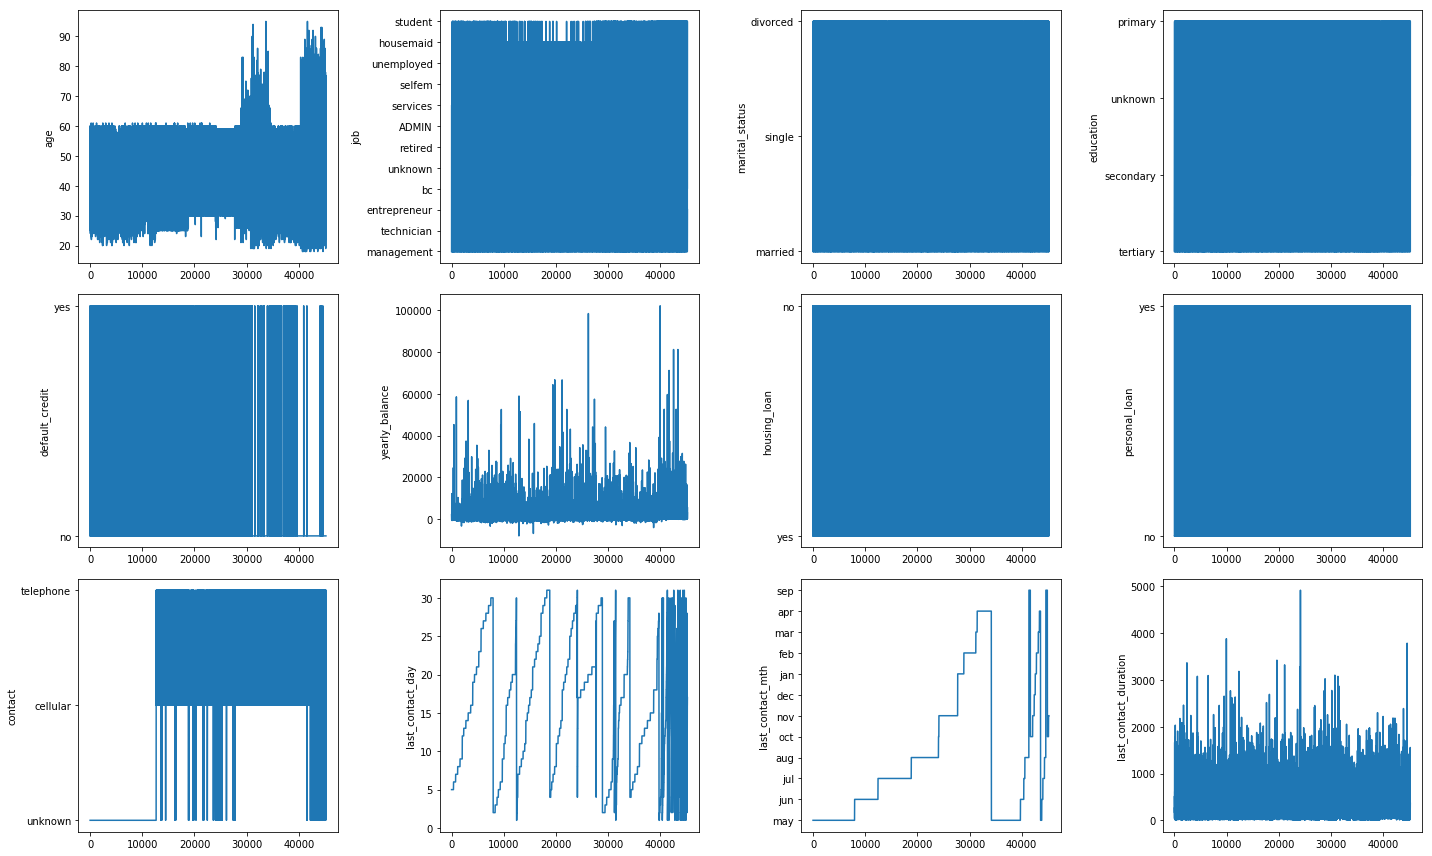

In [18]:
fig = plt.figure(figsize=(20,12))
plt.clf()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.plot(X.iloc[:, i])
    plt.ylabel(X.columns.values[i])
fig.tight_layout()

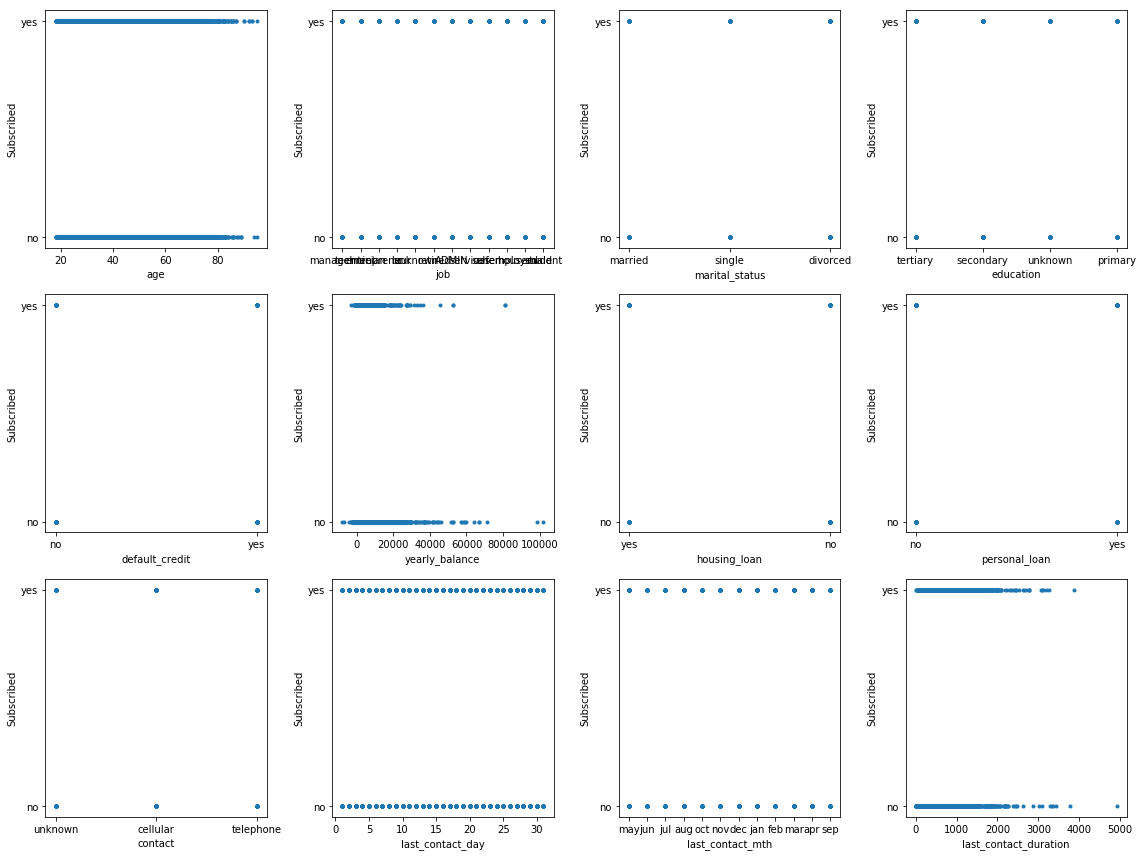

In [19]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.plot(X.iloc[:, i], T, '.')
    plt.xlabel(X.columns.values[i])
    plt.ylabel('Subscribed')
fig.tight_layout()

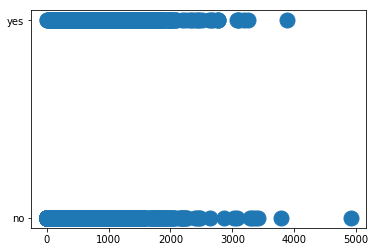

In [20]:
def f(t):
    'A damped exponential'
    s1 = np.cos(2 * np.pi * t)
    e1 = np.exp(-t)
    return s1 * e1


l = plt.plot(X.iloc[:, i], T, '.')
plt.setp(l, markersize=30)
plt.setp(l, markerfacecolor='C0')

plt.show()

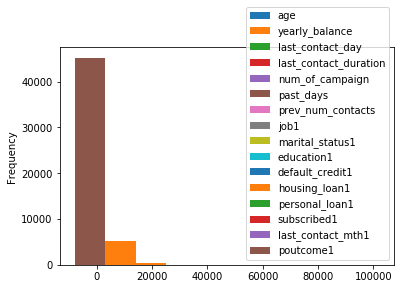

In [21]:
X.plot.hist()

Text(0.5, 1.0, 'Marital Status Vs Term Deposit Subcribed Numbers')

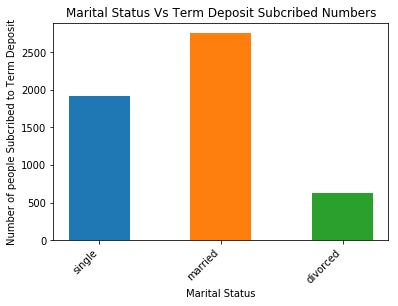

In [22]:
group = df.groupby(['marital_status1'])
LABELS = ["single","married","divorced"]

data=group['subscribed1'].aggregate(np.sum)

for num, vals in enumerate(data):
    plt.bar(num, vals, 0.5)
    
arr=df.groupby('marital_status1').apply(list)

plt.xticks( range(len(arr)),LABELS, rotation = 45, ha="right" )

plt.ylabel('Number of people Subcribed to Term Deposit')
plt.xlabel('Marital Status')
plt.title('Marital Status Vs Term Deposit Subcribed Numbers')

Text(0.5, 1.0, 'Jobs Vs Term Deposit Subcribed Numbers')

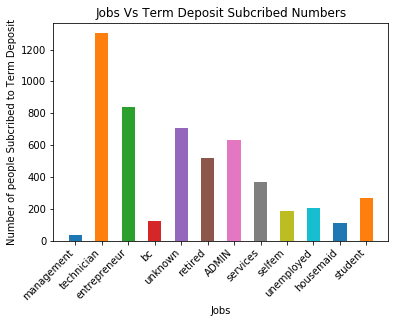

In [23]:
group = df.groupby(['job1'])
LABELS = ["management","technician","entrepreneur","bc","unknown","retired","ADMIN","services","selfem","unemployed","housemaid","student"]

data=group['subscribed1'].aggregate(np.sum)

for num, vals in enumerate(data):
    plt.bar(num, vals, 0.5)
    
arr=df.groupby('job1').apply(list)

plt.xticks( range(len(arr)),LABELS, rotation = 45, ha="right" )

plt.ylabel('Number of people Subcribed to Term Deposit')
plt.xlabel('Jobs')
plt.title('Jobs Vs Term Deposit Subcribed Numbers')

# Preliminary Observation

From the plots, it can be seen that the term deposit marketing works very well with Entrepreneurs and Technician jobs. It works the least for the self employed, students,housemaids and unemployed.

From the very first plot, it can be observed that the subscribers spikes rises between the age of 30-60 and gradually decrease with increase in the age. Also there are a lower number of subscription for ages below 25.
It can also be noticed that the last month to contact is higher on April compared to other months.
People usually prefer to contact via cellular or telephone medium rather than the unknown category.


# III. Method

### 1. First Deep Neural Network: 

In the first feed forward network, the number of nodes in hidden layer in this network is like this 20 --> 15 --> 10 --> 10 --> 15 --> 20.  I chose this structure as I wanted to see how the network works when the number of nodes contract from one hidden layer and expand to another hidden layer. It starts from approximately the same number of nodes as input features and then decreases by 5 at each hidden layer till a certain value which is 10. It again starts expanding by 5 till it reaches the same number of nodes as the first hidden layer.The IndicatorMatrix funtion adds extra columns based on the number of labels present for categorical values. 

### 2. Second Deep Neural Network: 

The number of nodes in hidden layer in this network is in this pattern 20 --> 5 --> 20 --> 5 --> 20 --> 5. It starts from approximately the same number of nodes as input features and then decreases to one-fourth i.e. 5 and keeps alternating between these two numbers until 6 hidden layers. Deciding the number of neurons in the hidden layers is a very important part of deciding your overall neural network architecture. Though these layers do not directly interact with the external environment, they have a tremendous influence on the final output. Both the number of hidden layers and the number of neurons in each of these hidden layers must be carefully considered.
Using too few neurons in the hidden layers will result in something called underfitting. Underfitting occurs when there are too few neurons in the hidden layers to adequately detect the signals in a complicated data set.

Using too many neurons in the hidden layers can result in problems as well. As there are too many neurons in the hidden layers, it may result in overfitting. Overfitting occurs when the neural network has so much information processing capacity that the limited amount of information contained in the training set is not enough to train all of the neurons in the hidden layers. 

So to avoid it, this structure was used.

### 3. Third Deep Neural Network: 

The number of nodes in hidden layer in this network follows this pattern: 10 --> 20 --> 30 --> 40 --> 50 --> 60. It starts from approximately half the number of nodes as input features and then increases by 10 at each hidden layer until six hidden layers, which clearly shows the expanding nature of the network. 

Such neural network is often associated with sufficiently deep architectures composed of high amounts of features. automatically expanded architectures converge to similar topologies that benefit from lesser amount of parameters or improved accuracy and exhibit systematic correspondence in representational complexity with the specified task.

Increasing the number of hidden layers much more than the sufficient number of layers will cause accuracy in the test set to decrease. It will cause the network to overfit to the training set, that is, it will learn the training data, but it won't be able to generalize to new unseen data.

In [24]:
df['past_days']=df['past_days'].replace(-1, 0)
df['subscribed']=df['subscribed'].replace('no', -1)
df['subscribed']=df['subscribed'].replace('yes', 1)

In [25]:
X.values

array([[58, 'management', 'married', ..., 0, 5, 3],
       [44, 'technician', 'single', ..., 0, 5, 3],
       [33, 'entrepreneur', 'married', ..., 0, 5, 3],
       ...,
       [72, 'retired', 'married', ..., 1, 11, 1],
       [57, 'bc', 'married', ..., 0, 11, 3],
       [37, 'entrepreneur', 'married', ..., 0, 11, 2]], dtype=object)

In [26]:
normalized_age=(df['age']-df['age'].mean())/df['age'].std()
normalized_age

0        1.606947
1        0.288526
2       -0.747376
3        0.571045
4       -0.747376
5       -0.559030
6       -1.218241
7        0.100180
8        1.606947
9        0.194353
10       0.006007
11      -1.124068
12       1.136083
13       1.606947
14       1.512774
15       0.947737
16       0.382699
17       1.512774
18       1.795293
19      -0.747376
20      -1.218241
21       1.418601
22      -0.841549
23      -1.500760
24      -0.088166
25       0.288526
26      -0.182339
27       1.041910
28       0.476872
29      -0.464857
           ...   
45181    0.476872
45182   -0.653203
45183    2.737022
45184    2.077812
45185    1.795293
45186    1.701120
45187   -0.841549
45188   -1.124068
45189   -1.500760
45190   -0.841549
45191    3.207887
45192   -1.124068
45193   -1.218241
45194    1.701120
45195    2.548677
45196   -1.500760
45197   -0.464857
45198   -0.370684
45199   -0.653203
45200   -0.276512
45201    1.136083
45202   -0.653203
45203   -1.689106
45204    3.019541
45205   -1

In [27]:
normalized_age=(df['age']-df['age'].mean())/df['age'].std()
normalized_yearly_balance=(df['yearly_balance']-df['yearly_balance'].mean())/df['yearly_balance'].std()
normalized_last_contact_duration=(df['last_contact_duration']-df['last_contact_duration'].mean())/df['last_contact_duration'].std()
normalized_num_of_campaign=(df['num_of_campaign']-df['num_of_campaign'].mean())/df['num_of_campaign'].std()
normalized_prev_num_contacts=(df['prev_num_contacts']-df['prev_num_contacts'].mean())/df['prev_num_contacts'].std()
normalized_past_days=(df['past_days']-df['past_days'].mean())/df['past_days'].std()

Xnor = pd.concat([normalized_age,
        pd.get_dummies(df.loc[:, 'job']), 
        pd.get_dummies(df.loc[:, 'marital_status']), 
        pd.get_dummies(df.loc[:, 'education']),
        pd.get_dummies(df.loc[:, 'default_credit']),
        normalized_yearly_balance,
        pd.get_dummies(df.loc[:, 'housing_loan']),
        pd.get_dummies(df.loc[:, 'personal_loan']),
        normalized_last_contact_duration  ,
        normalized_num_of_campaign  ,
        normalized_past_days  ,
        normalized_prev_num_contacts ,
        pd.get_dummies(df.loc[:, 'poutcome']),
        df['subscribed']],
       axis=1)
pd.set_option('display.max_columns',500)

X = pd.concat([df['age'],
        pd.get_dummies(df.loc[:, 'job']), 
        pd.get_dummies(df.loc[:, 'marital_status']), 
        pd.get_dummies(df.loc[:, 'education']),
        pd.get_dummies(df.loc[:, 'default_credit']),
        df['yearly_balance'],
        pd.get_dummies(df.loc[:, 'housing_loan']),
        pd.get_dummies(df.loc[:, 'personal_loan']),
        df['last_contact_duration']  ,
        df['num_of_campaign']  ,
        df['past_days']  ,
        df['prev_num_contacts'] ,
        pd.get_dummies(df.loc[:, 'poutcome']),
        df['subscribed']],
       axis=1)
pd.set_option('display.max_columns',500)

X.values

array([[58,  0,  0, ...,  0,  1, -1],
       [44,  0,  0, ...,  0,  1, -1],
       [33,  0,  0, ...,  0,  1, -1],
       ...,
       [72,  0,  0, ...,  1,  0,  1],
       [57,  0,  1, ...,  0,  1, -1],
       [37,  0,  0, ...,  0,  0, -1]], dtype=int64)

(5289, 36)
(39922, 36)


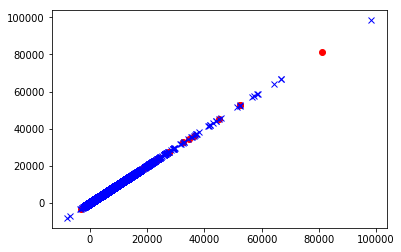

In [28]:
X_val=X.values

C1=X_val[np.where(X_val[:,35] == 1)]
C2=X_val[np.where(X_val[:,35] == -1)]
print(C1.shape)
print(C2.shape)

plt.plot(C1[:4231,:35], C1[:4231,:35], 'or')
plt.plot(C2[:31937,:35], C2[:31937,:35], 'xb')

T=df['subscribed']

In [29]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [30]:
X_all=X.iloc[:,:35]

In [51]:
Xlst, Tlst = partition(pd.DataFrame(X_all), pd.DataFrame(T))

In [52]:
Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ytrain, Ytest = [tt.as_matrix() for tt in Tlst]

C:\Users\nishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\nishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [53]:
import tensorflow as tf

node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0)

with tf.Session() as sess:
    op_add = tf.add(node1, node2)
    print(op_add)
    print(sess.run(op_add))

Tensor("Add_50:0", shape=(), dtype=float32)
7.0


In [54]:

def IndicatorMatrix(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    T = np.zeros((n_labels, n_unique_labels))
    T[np.arange(n_labels), labels] = 1
    return T

In [55]:
Ttrain= IndicatorMatrix(Ytrain)
Ttest= IndicatorMatrix(Ytest)
print(Ttrain.shape)
print(Ttest.shape)
print(Ttrain)

(36169, 2)
(9042, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# 1. First DNN

This deep neural network is a feed forward network that contracts the number of nodes per hidden layer and then expands back to the number of inputs. So, the number of nodes per hidden layer follows this pattern: 20 --> 15 --> 10 --> 10 --> 15 --> 20. This structure was chosen because there are so many features and how the model explores all of these features when it is contracted and again brought back to normal is kind of fascinating.

In the code below, the learning rate is set to 0.05 for consistency through each of the 3 networks, and the number of epochs is limited to 10. For each epoch, the mean squared error and accuracy are both calculated for the training set, and the mean squared error and accuracy are finally calculated for the test set.

In [56]:
learning_rate = 0.05
training_epochs = 10 
cost_history = np.empty(shape = [1], dtype = float)
n_dim = Xtrain.shape[1] 
n_class = 2 

#define the number of nodes for each hidden layer
n_hidden_1 = 20
n_hidden_2 = 15
n_hidden_3 = 10
n_hidden_4 = 10
n_hidden_5 = 15
n_hidden_6 = 20

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class])) 
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

#define weight for each hidden layer
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}

#define biases for each hidden layer
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class])) 
}
#initialize all the variables and layers
init = tf.global_variables_initializer()
saver = tf.train.Saver()

layer_1 = tf.add(tf.matmul(x, weights['h1']),  biases['b1'])
layer_1 = tf.nn.sigmoid(layer_1)
    
layer_2 = tf.add(tf.matmul(layer_1, weights['h2']),  biases['b2'])
layer_2 = tf.nn.sigmoid(layer_2)


layer_3 = tf.add(tf.matmul(layer_2, weights['h3']),  biases['b3'])
layer_3 = tf.nn.sigmoid(layer_3)

layer_4 = tf.add(tf.matmul(layer_3, weights['h4']),  biases['b4'])
layer_4 = tf.nn.sigmoid(layer_4)

layer_5 = tf.add(tf.matmul(layer_4, weights['h5']),  biases['b5'])
layer_5 = tf.nn.sigmoid(layer_5)

layer_6 = tf.add(tf.matmul(layer_5, weights['h6']),  biases['b6'])
layer_6 = tf.nn.relu(layer_6)

out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
y= out_layer

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function) 

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []
#run for accuracy and mse
for epoch in range(training_epochs):
#     %timeit sess.run(training_step, feed_dict={x: X_train, y_: T_train})
    sess.run(training_step, feed_dict={x: Xtrain, y_: Ttrain})
    cost = sess.run(cost_function, feed_dict={x: Xtrain, y_: Ttrain})
    cost_history = np.append(cost_history, cost) #Appends cost
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict={x: Xtest})
    mse = tf.reduce_mean(tf.square(pred_y - Ttest))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: Xtrain, y_: Ttrain}))
    accuracy_history.append(accuracy)


MSE history


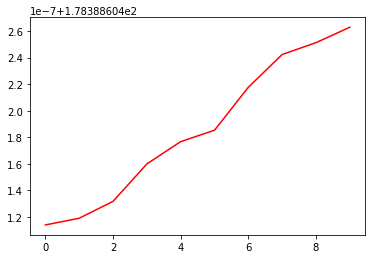

Accuracy over epochs


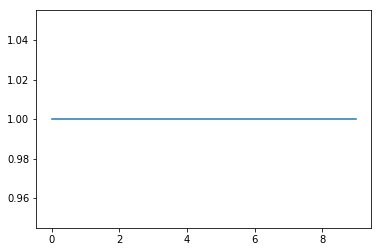

Test accuracy:  1.0
MSE: 178.3886


In [57]:
#Plot mse and accuracy graph
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()

#Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: Xtest, y_: Ttest})))

#Print the final mean square error
pred_y = sess.run(y, feed_dict={x: Xtest})
mse = tf.reduce_mean(tf.square(pred_y - Ttest))
print("MSE: %.4f" % sess.run(mse))

sess.close()

# 2. Second Deep Neural Network

Like the first model, this deep neural network is also feed forward network but this model alternates with the number of nodes in each hidden layer. So, The number of nodes in hidden layer in this network is like this 20 --> 5 --> 20 --> 5 --> 20 --> 5. This structure was chosen because there are many features and wanted to see how the model exploits these features when it is contracted and expanded repeatedly. Also this seemed like a better way to avoid overfitting and underfitting that is ususally caused by choosing lesser/more number of neurons than expected.

The code below is the same as in the previous model. The only difference is in the number of nodes per hidden layer. In the code below the learning rate is set to 0.05 for consistency through each of the 4 networks, and the number of epochs is limited to 10. For each epoch, the mean squared error and accuracy are both calculated for the training set, and the mean squared error and accuracy are finally calculated for the test set.

In [58]:
learning_rate = 0.05
training_epochs = 10
cost_history = np.empty(shape = [1], dtype = float)
n_dim = Xtrain.shape[1]
n_class = 2 

n_hidden_1 = 20
n_hidden_2 = 5
n_hidden_3 = 20
n_hidden_4 = 5
n_hidden_5 = 20
n_hidden_6 = 5

x = tf.placeholder(tf.float32, [None, n_dim]) 
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

init = tf.global_variables_initializer()
saver = tf.train.Saver() 

layer_1 = tf.add(tf.matmul(x, weights['h1']),  biases['b1'])
layer_1 = tf.nn.sigmoid(layer_1)
    
layer_2 = tf.add(tf.matmul(layer_1, weights['h2']),  biases['b2'])
layer_2 = tf.nn.sigmoid(layer_2)

layer_3 = tf.add(tf.matmul(layer_2, weights['h3']),  biases['b3'])
layer_3 = tf.nn.sigmoid(layer_3)

layer_4 = tf.add(tf.matmul(layer_3, weights['h4']),  biases['b4'])
layer_4 = tf.nn.sigmoid(layer_4)

layer_5 = tf.add(tf.matmul(layer_4, weights['h5']),  biases['b5'])
layer_5 = tf.nn.sigmoid(layer_5)

layer_6 = tf.add(tf.matmul(layer_5, weights['h6']),  biases['b6'])
layer_6 = tf.nn.relu(layer_6)

out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
y= out_layer

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))  
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
#     %timeit sess.run(training_step, feed_dict={x: X_train, y_: T_train})
    sess.run(training_step, feed_dict={x: Xtrain, y_: Ttrain})
    cost = sess.run(cost_function, feed_dict={x: Xtrain, y_: Ttrain})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict={x: Xtest})
    mse = tf.reduce_mean(tf.square(pred_y - Ttest))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: Xtrain, y_: Ttrain}))
    accuracy_history.append(accuracy)

MSE history


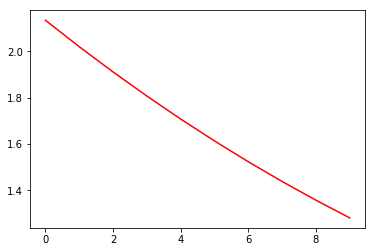

Accuracy over epochs


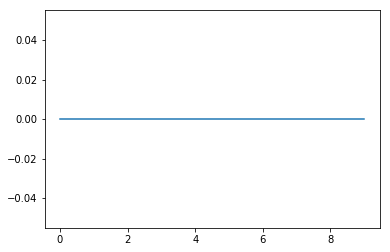

Test accuracy:  0.0
MSE: 1.2802


In [59]:
#Plot mse and accuracy graph
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()

#Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: Xtest, y_: Ttest})))

#Print the final mean square error
pred_y = sess.run(y, feed_dict={x: Xtest})
mse = tf.reduce_mean(tf.square(pred_y - Ttest))
print("MSE: %.4f" % sess.run(mse))

sess.close()

 # 3. Third Deep Neural Network
 
This deep neural network is also feed forward network but this model increases the number of neurons in each hidden layer which acts like expanding network. So, The number of nodes in hidden layer in this network is in the following pattern: 10 --> 20 --> 30 --> 40 --> 50 --> 60. This structure was chosen because there are many features and how the model exploits all these features when it is expanded over the hidden layers is interesting.

The code below is also the same as in the previous model. The only difference is in the number of nodes per hidden layer. In the code below the learning rate is set to 0.05 for consistency through each of the 4 networks, and the number of epochs is limited to 10. For each epoch, the mean squared error and accuracy are both calculated for the training set, and the mean squared error and accuracy are finally calculated for the test set.

In [60]:
learning_rate = 0.05
training_epochs = 10 #200
cost_history = np.empty(shape = [1], dtype = float)
n_dim = Xtrain.shape[1] 
n_class = 2

n_hidden_1 = 10 
n_hidden_2 = 20
n_hidden_3 = 30
n_hidden_4 = 40
n_hidden_5 = 50
n_hidden_6 = 60

x = tf.placeholder(tf.float32, [None, n_dim]) 
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

init = tf.global_variables_initializer()
saver = tf.train.Saver() 

layer_1 = tf.add(tf.matmul(x, weights['h1']),  biases['b1'])
layer_1 = tf.nn.sigmoid(layer_1)
    
layer_2 = tf.add(tf.matmul(layer_1, weights['h2']),  biases['b2'])
layer_2 = tf.nn.sigmoid(layer_2)

layer_3 = tf.add(tf.matmul(layer_2, weights['h3']),  biases['b3'])
layer_3 = tf.nn.sigmoid(layer_3)

layer_4 = tf.add(tf.matmul(layer_3, weights['h4']),  biases['b4'])
layer_4 = tf.nn.sigmoid(layer_4)

layer_5 = tf.add(tf.matmul(layer_4, weights['h5']),  biases['b5'])
layer_5 = tf.nn.sigmoid(layer_5)

layer_6 = tf.add(tf.matmul(layer_5, weights['h6']),  biases['b6'])
layer_6 = tf.nn.relu(layer_6)

out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
y= out_layer

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))  
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
#     %timeit sess.run(training_step, feed_dict={x: X_train, y_: T_train})
    sess.run(training_step, feed_dict={x: Xtrain, y_: Ttrain})
    cost = sess.run(cost_function, feed_dict={x: Xtrain, y_: Ttrain})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict={x: Xtest})
    mse = tf.reduce_mean(tf.square(pred_y - Ttest))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: Xtrain, y_: Ttrain}))
    accuracy_history.append(accuracy)

MSE history


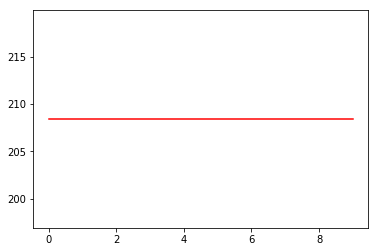

Accuracy over epochs


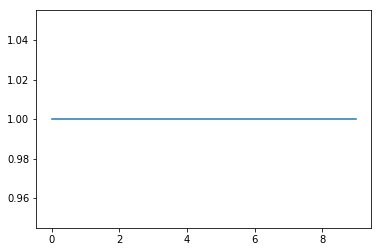

Test accuracy:  1.0
MSE: 208.4136


In [61]:
#Plot mse and accuracy graph
print('MSE history')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()

#Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: Xtest, y_: Ttest})))

#Print the final mean square error
pred_y = sess.run(y, feed_dict={x: Xtest})
mse = tf.reduce_mean(tf.square(pred_y - Ttest))
print("MSE: %.4f" % sess.run(mse))

sess.close()

# Explanation of experimental codes

As seen above, the data is partitioned first and then the training data is feeded into the deep neural networks. All the three networks are similar but have different architectures i.e. the number of neurons in the hidden layer are different. Firstly, the model is trained based on the trained data as it passes through the feed forward neural network. Then the test data is tested upon to see if the predictions are good. This is done by calculating the accuracy and checking the MSE. 

# Result

From the plots seen from the different neural network structures, it is obvious that the Second Neural Network works best in our dataset. Here the number of neurons in the hidden layer contracts and expands alternatively. This structure was chosen just to see if it could avoid overfitting and underfitting. 

So basically, other two neural networks (First DNN and the Second DNN) didn't work well given the dataset. Though the hidden layers do not directly interact with the external environment, they have a tremendous influence on the final output. Both the number of hidden layers and the number of neurons in each of these hidden layers must be carefully considered.
Using too few neurons in the hidden layers will result in something called underfitting. Underfitting occurs when there are less neurons in the hidden layers to adequately detect the signals in a complicated data set.

Using too many neurons in the hidden layers can result in problems as well. As there are too many neurons in the hidden layers, it may result in overfitting. The Secone DNN is a perfect way to avoid both the problems.

# Conclusion

This assigment gave the basic idea how to go about tensorflow. All the three neural network structures were implemented successfully. Also implementing the Deep Neural Network was challenging. It got easier after the first one was implemented.